In [1]:
%load_ext autoreload
%autoreload 2

import galsim
import numpy as np
from tqdm import trange, tqdm
import matplotlib.pyplot as plt
import pickle

In [2]:
import sys
sys.path.append(
    "/data/groups/jeltema/zhou/lsst_shear/WeakLensingDeblending/bin"
)

In [3]:
import mdet_meas_tools as mmt
from sim_func import sim_func
import galsim
import numpy as np
import pandas as pd
plt.style.use("MNRAS")

In [4]:
dc2_halo = pd.read_pickle("../data/dc2_halo.pkl")

In [5]:
gal_df = pd.read_pickle("../data/dc2_gals_wl.pkl")

In [6]:
halo_ids = dc2_halo.index.values

In [7]:
dc2_halo.groupby("mass_bin").count()

,ra,dec,g_ab,r_ab,i_ab,z_ab,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,pa_disk,...,redshift,halo_mass,stellar_mass,is_central,position_x,position_y,position_z,log_mass,mass_rank,mass_group
mass_bin,,,,,,,,,,,,,,,,,,,,,
"(0.0, 11.0]",2223892,2223892,2223892,2223892,2223892,2223892,2223892,2223892,2223892,2223892,...,2223892,2223892,2223892,2223892,2223892,2223892,2223892,2223892,2223892,2223892
"(11.0, 11.5]",3100312,3100312,3100312,3100312,3100312,3100312,3100312,3100312,3100312,3100312,...,3100312,3100312,3100312,3100312,3100312,3100312,3100312,3100312,3100312,3100312
"(11.5, 12.0]",2203283,2203283,2203283,2203283,2203283,2203283,2203283,2203283,2203283,2203283,...,2203283,2203283,2203283,2203283,2203283,2203283,2203283,2203283,2203283,2203283
"(12.0, 12.5]",833027,833027,833027,833027,833027,833027,833027,833027,833027,833027,...,833027,833027,833027,833027,833027,833027,833027,833027,833027,833027
"(12.5, 13.0]",217677,217677,217677,217677,217677,217677,217677,217677,217677,217677,...,217677,217677,217677,217677,217677,217677,217677,217677,217677,217677
"(13.0, 13.5]",50080,50080,50080,50080,50080,50080,50080,50080,50080,50080,...,50080,50080,50080,50080,50080,50080,50080,50080,50080,50080
"(13.5, 25.0]",9435,9435,9435,9435,9435,9435,9435,9435,9435,9435,...,9435,9435,9435,9435,9435,9435,9435,9435,9435,9435


In [82]:
mass_bins = dc2_halo.mass_bin.cat.categories

In [109]:
massive_halo_ids = dc2_halo[dc2_halo['mass_bin']==mass_bins[-1]].index.values
massive_halo_ids_sur = dc2_halo_sampled[dc2_halo_sampled['mass_bin']==mass_bins[-1]].index.values
massive_gals = gal_df[gal_df['halo_id'].isin(massive_halo_ids)]
massive_gals_sur = gal_df[gal_df['halo_id'].isin(massive_halo_ids_sur)]

In [126]:
print(len(massive_gals))
massive_gals['is_central'].sum()

206822


8832

684

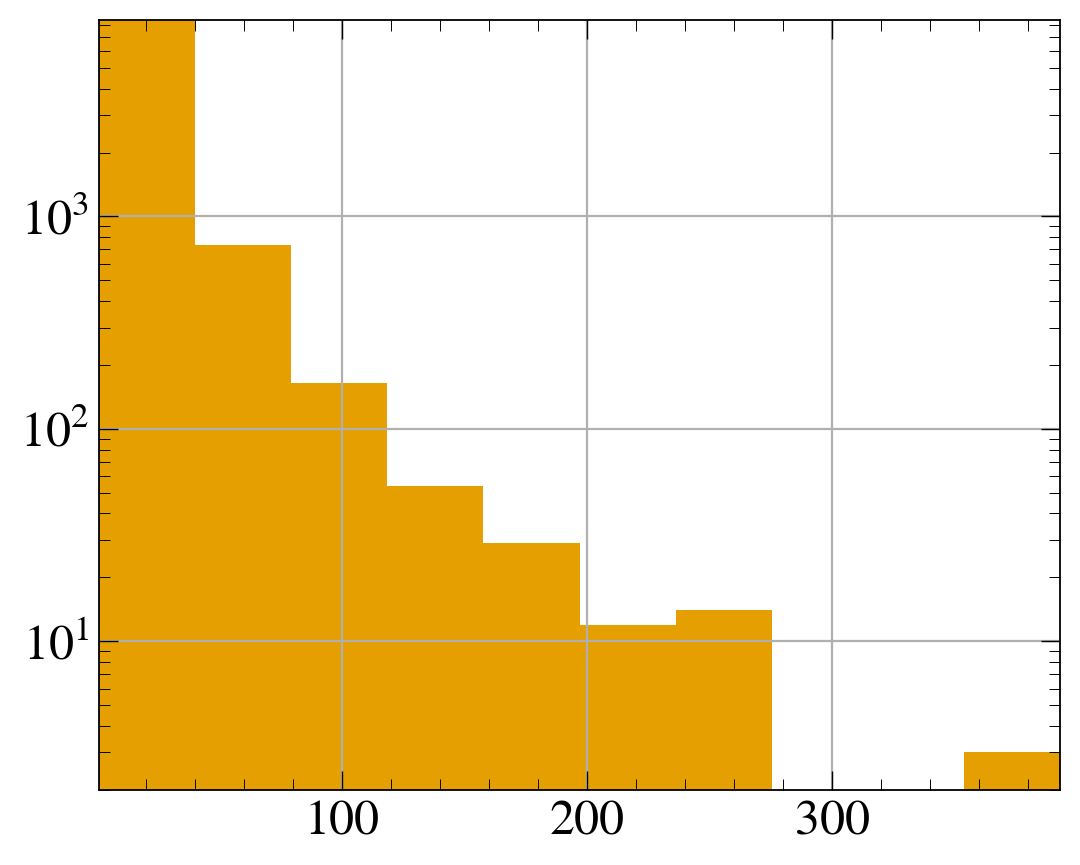

In [116]:
massive_gals.groupby('halo_id').count()['ra'].hist(log=True)
np.sum(massive_gals.groupby('halo_id').count()['ra'] >= 50)

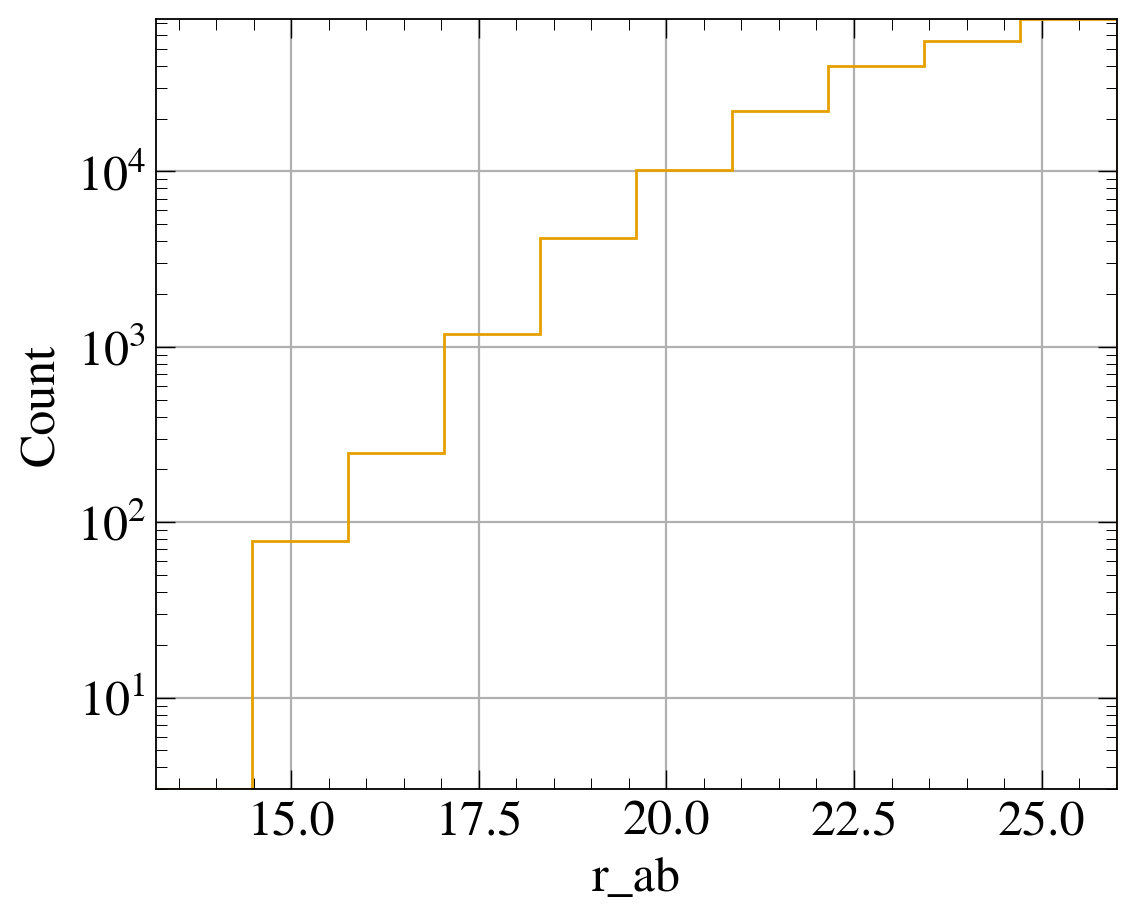

In [117]:
fig, ax = plt.subplots()
massive_gals['r_ab'].hist(histtype='step', ax=ax)
plt.xlabel('r_ab')
plt.ylabel('Count')
plt.yscale('log')
# plt.legend(loc='upper left')

In [ ]:
fig, ax = plt.subplots()
massive_gals['r_ab'].hist(histtype='step', ax=ax)
plt.xlabel('r_ab')
plt.ylabel('Count')
plt.yscale('log')
# plt.legend(loc='upper left')

In [128]:
massive_gals.columns

Index(['ra', 'dec', 'g_ab', 'r_ab', 'i_ab', 'z_ab', 'fluxnorm_bulge',
       'fluxnorm_disk', 'fluxnorm_agn', 'pa_disk', 'pa_bulge', 'a_d', 'b_d',
       'a_b', 'b_b', 'redshift', 'galtileid', 'halo_mass', 'halo_id',
       'stellar_mass', 'is_central', 'position_x', 'position_y', 'position_z',
       'wf_gal'],
      dtype='object')

: 

In [8]:
dc2_halo_sampled = dc2_halo.groupby("mass_bin").sample(n=9200)

In [68]:
dc2_halo_sampled.groupby("mass_bin")

In [10]:
dc2_halo_sampled

,ra,dec,g_ab,r_ab,i_ab,z_ab,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,pa_disk,...,halo_mass,stellar_mass,is_central,position_x,position_y,position_z,log_mass,mass_rank,mass_group,mass_bin
halo_id,,,,,,,,,,,,,,,,,,,,,
4991700155208,63.212642,-40.190854,25.983807,25.798946,25.486635,25.150469,0.080990,0.919010,0.0,-115.969955,...,9.890439e+10,7.143579e+08,True,1437.349045,2847.059653,-2695.082801,10.995216,6451139.0,7,"(0.0, 11.0]"
-48438400155159,61.809676,-40.222546,25.836950,25.925089,26.050087,26.106516,0.999779,0.000221,0.0,-119.608315,...,8.346947e+10,2.138083e+08,True,1926.470689,3592.019009,-3446.634298,10.921528,6870206.0,7,"(0.0, 11.0]"
-2297100143355,65.972271,-38.435828,26.872568,25.812914,25.559338,25.422472,0.227180,0.772820,0.0,-19.815546,...,1.323248e+10,1.809698e+07,True,481.060103,1079.270312,-937.827269,10.121641,8597925.0,9,"(0.0, 11.0]"
326500097253,64.199590,-34.058121,26.208612,25.580454,24.668877,24.205290,0.269348,0.730652,0.0,-24.853680,...,6.506867e+10,3.389944e+08,True,1144.166672,2366.809942,-1776.654139,10.813372,7530129.5,8,"(0.0, 11.0]"
944300168189,63.944490,-42.419106,25.742949,25.892580,25.844894,25.851784,0.867046,0.132954,0.0,-84.396240,...,7.547966e+10,3.277562e+08,True,1476.531381,3019.378920,-3071.723702,10.877830,7130562.0,8,"(0.0, 11.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286100128323,64.702369,-36.826826,22.792238,21.260214,20.319103,19.919575,1.000000,0.000000,0.0,-153.598633,...,3.610110e+13,7.069073e+10,False,676.564133,1431.623067,-1185.861786,13.557520,7443.5,0,"(13.5, 25.0]"
3268900155230,62.339064,-40.513455,25.641396,24.221811,23.209042,22.387993,1.000000,0.000000,0.0,-47.344273,...,1.184286e+14,8.457006e+10,False,1296.778543,2473.365600,-2386.601208,14.073457,708.0,0,"(13.5, 25.0]"
558100181355,68.797489,-43.631329,25.131191,23.732586,23.246315,22.977787,0.351933,0.648067,0.0,-104.650803,...,4.456359e+13,3.710724e+08,False,399.455541,1029.796933,-1052.968028,13.648980,5052.0,0,"(13.5, 25.0]"


In [11]:
halo_index_sub = dc2_halo_sampled.index.values

In [26]:
R11_dic = {}
error_list = []
for halo_id in tqdm(halo_index_sub):
    halo_mask = gal_df["halo_id"] == halo_id
    gal_df_for_halo = gal_df[halo_mask]
    assert len(gal_df_for_halo)!=0

    try:
        pdata, mdata, m, msd, c, csd, R11 = mmt.run_mdet_sims(gal_df_for_halo,
                sim_func=sim_func,
                sim_kwargs={
                    "noise": 420
                },
                seed=123,
                n_sims=50,
                use_p=True,
                use_m=False)
        # print(R11)
    except AssertionError as e:
        error_list.append(e)
        R11 = np.nan
    dc2_halo_sampled.loc[halo_id, "R11"] = R11
    R11_dic[halo_id] = R11
    # print(R11)

100%|██████████| 64400/64400 [23:31:26<00:00,  1.32s/it]    


In [29]:
with open("../data/R11_dic.pkl", "wb") as f:
    pickle.dump(R11_dic, f)

In [30]:
len(R11_dic)

64400

In [36]:
dc2_halo_sampled['R11']=R11_dic.values()

In [38]:
dc2_halo_sampled.dropna(inplace=True,axis=0)

In [39]:
len(dc2_halo_sampled)

7464

In [65]:
dc2_halo_sampled.groupby("mass_bin").count()

,ra,dec,g_ab,r_ab,i_ab,z_ab,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,pa_disk,...,halo_mass,stellar_mass,is_central,position_x,position_y,position_z,log_mass,mass_rank,mass_group,R11
mass_bin,,,,,,,,,,,,,,,,,,,,,
"(0.0, 11.0]",503,503,503,503,503,503,503,503,503,503,...,503,503,503,503,503,503,503,503,503,503
"(11.0, 11.5]",1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,...,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111
"(11.5, 12.0]",1879,1879,1879,1879,1879,1879,1879,1879,1879,1879,...,1879,1879,1879,1879,1879,1879,1879,1879,1879,1879
"(12.0, 12.5]",2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,...,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035
"(12.5, 13.0]",1351,1351,1351,1351,1351,1351,1351,1351,1351,1351,...,1351,1351,1351,1351,1351,1351,1351,1351,1351,1351
"(13.0, 13.5]",510,510,510,510,510,510,510,510,510,510,...,510,510,510,510,510,510,510,510,510,510
"(13.5, 25.0]",75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75


In [47]:
R11_mean = dc2_halo_sampled.groupby('mass_bin').mean()['R11']
R11_std = dc2_halo_sampled.groupby('mass_bin').std()['R11']
mean_mass = dc2_halo_sampled.groupby('mass_bin').mean()['log_mass']
print(R11_mean)

mass_bin
(0.0, 11.0]     0.377669
(11.0, 11.5]    0.367330
(11.5, 12.0]    0.348131
(12.0, 12.5]    0.319619
(12.5, 13.0]    0.319583
(13.0, 13.5]    0.324238
(13.5, 25.0]    0.326993
Name: R11, dtype: float64


In [63]:
dc2_halo_sampled.groupby("mass_bin").count()

,ra,dec,g_ab,r_ab,i_ab,z_ab,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,pa_disk,...,halo_mass,stellar_mass,is_central,position_x,position_y,position_z,log_mass,mass_rank,mass_group,R11
mass_bin,,,,,,,,,,,,,,,,,,,,,
"(0.0, 11.0]",503,503,503,503,503,503,503,503,503,503,...,503,503,503,503,503,503,503,503,503,503
"(11.0, 11.5]",1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,...,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111
"(11.5, 12.0]",1879,1879,1879,1879,1879,1879,1879,1879,1879,1879,...,1879,1879,1879,1879,1879,1879,1879,1879,1879,1879
"(12.0, 12.5]",2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,...,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035
"(12.5, 13.0]",1351,1351,1351,1351,1351,1351,1351,1351,1351,1351,...,1351,1351,1351,1351,1351,1351,1351,1351,1351,1351
"(13.0, 13.5]",510,510,510,510,510,510,510,510,510,510,...,510,510,510,510,510,510,510,510,510,510
"(13.5, 25.0]",75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75


Text(0, 0.5, '$R_{11}$')

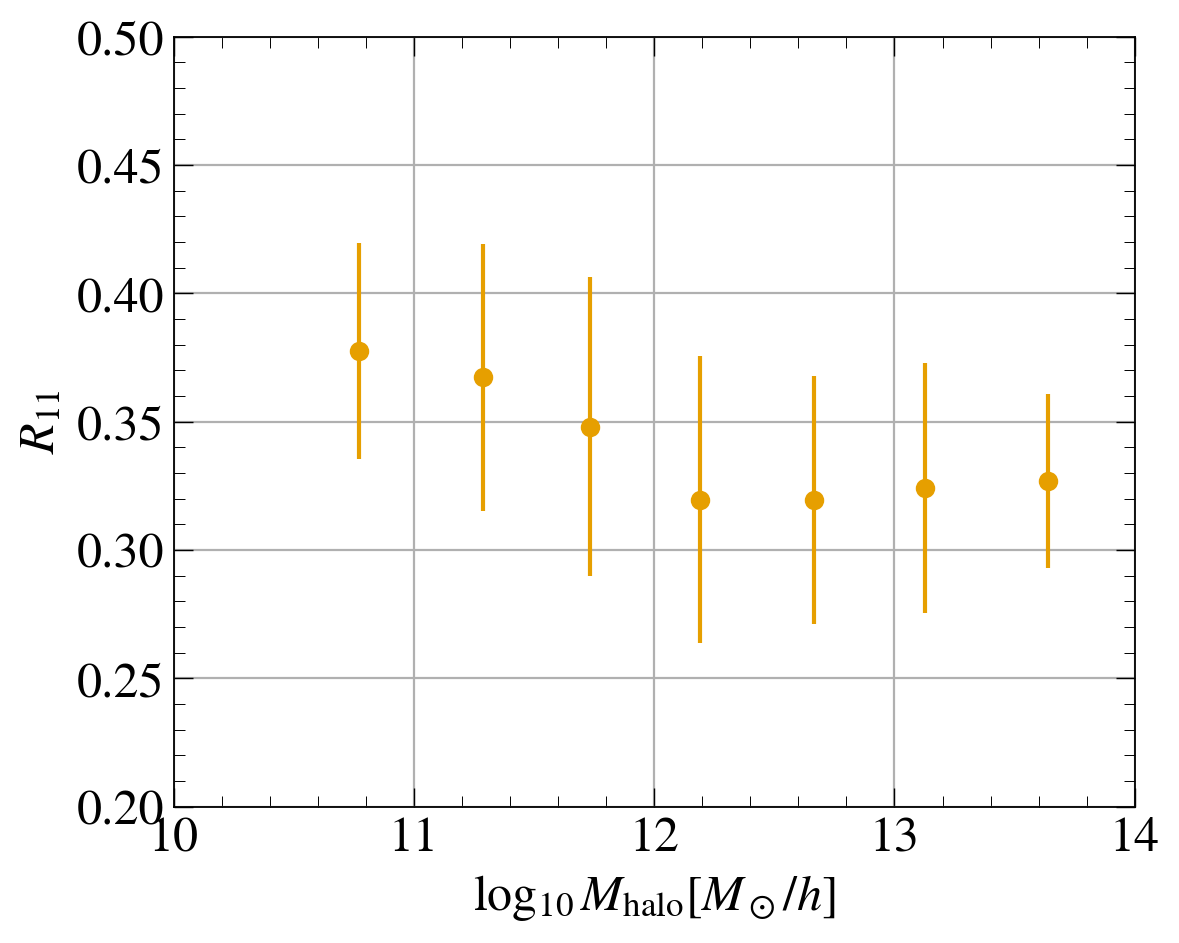

In [50]:
plt.errorbar(mean_mass,R11_mean,yerr=R11_std,fmt='o')
plt.xlim(10,14)
plt.ylim(0.2,0.5)
plt.xlabel(r"$\log_{10} M_{\rm halo} [M_\odot/h]$")
plt.ylabel(r"$R_{11}$")

In [59]:
bulge_mean = dc2_halo_sampled.groupby('mass_bin').mean()['fluxnorm_bulge']
bulge_std = dc2_halo_sampled.groupby('mass_bin').std()['fluxnorm_bulge']
mean_mass = dc2_halo_sampled.groupby('mass_bin').mean()['log_mass']
print(bulge_mean)

mass_bin
(0.0, 11.0]     0.278941
(11.0, 11.5]    0.340238
(11.5, 12.0]    0.526849
(12.0, 12.5]    0.844248
(12.5, 13.0]    0.861073
(13.0, 13.5]    0.826414
(13.5, 25.0]    0.732413
Name: fluxnorm_bulge, dtype: float32


Text(0, 0.5, 'bulge_frac')

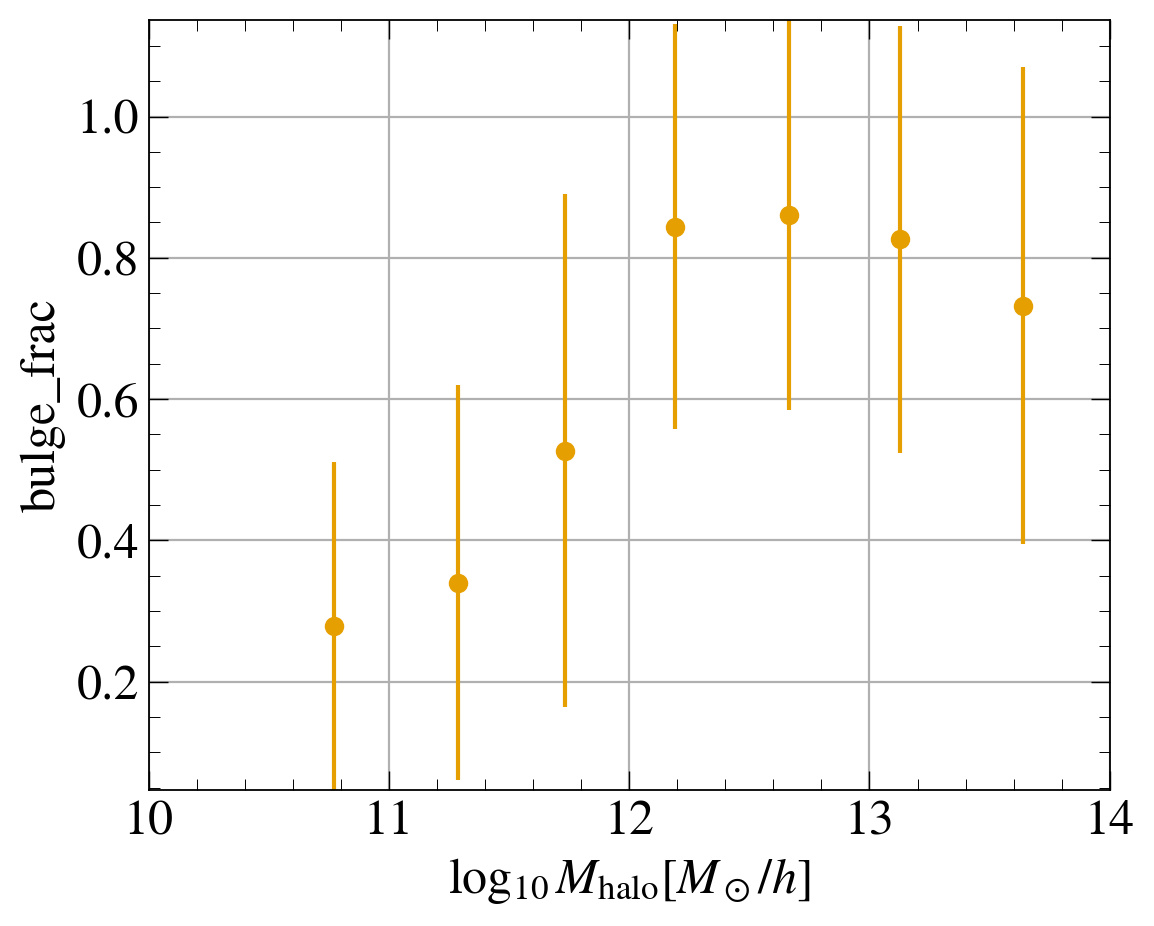

In [64]:
plt.errorbar(mean_mass,bulge_mean,yerr=bulge_std,fmt='o')
plt.xlim(10,14)
# plt.ylim(0.2,0.5)
plt.xlabel(r"$\log_{10} M_{\rm halo} [M_\odot/h]$")
plt.ylabel(r"bulge_frac")